# Linear Operators

Finite dimensional linear operators allow matrix algebra without explicitly constructing a full representation. Instead it suffices to define a matrix-vector product and a shape attribute. This avoids unnecessary memory usage and can often be more convenient to derive.

In [1]:
# Make inline plots vector graphics instead of raster graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# Plotting
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [9.5, 6]
plt.rcParams['font.size'] = 18 
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsfonts}']

## Sparsity and Operator Arithmetic

In [2]:
import numpy as np
import scipy.sparse
from probnum.linalg.linear_operators import MatrixMult, Identity

# Linear operator from sparse matrix
n = 50
mat = scipy.sparse.rand(m=n, n=n, density=0.05, random_state=42)
A = MatrixMult(A=mat)

# Linear operator arithmetic
Id = Identity(shape=n)
B = A ** 4 + 1.5 * Id

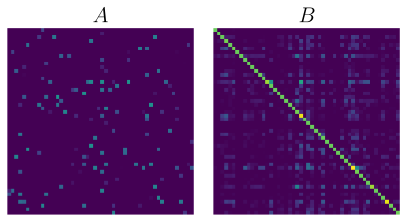

In [3]:
# Plot
matdict = {"$A$": A.todense(), "$B$": B.todense()}
vmin = np.min([np.min(mat) for mat in list(matdict.values())])
vmax = np.max([np.max(mat) for mat in list(matdict.values())])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3.5))
for i, (title, mat) in enumerate(matdict.items()): 
    axes[i].imshow(mat, vmin=vmin, vmax=vmax)
    axes[i].set_axis_off()
    axes[i].title.set_text(title)
fig.tight_layout()

## The Kronecker Product

In [4]:
from probnum.linalg.linear_operators import Kronecker, SymmetricKronecker

# Kronecker Product
A = np.array([[4, 1, 4], 
              [2, 3, 2]])
B = np.array([[1], [4]])
W = Kronecker(A, B)
V = Kronecker(B, A)

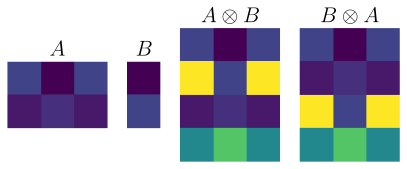

In [5]:
# Plot
matdict = {"$A$": A, "$B$": B, "$A \otimes B$": W.todense(), "$B \otimes A$": V.todense()}
vmin = np.min([np.min(mat) for mat in list(matdict.values())])
vmax = np.max([np.max(mat) for mat in list(matdict.values())])

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 3.5), gridspec_kw={'width_ratios': [3, 1, 3, 3]})
for i, (title, mat) in enumerate(matdict.items()): 
    axes[i].imshow(mat, vmin=vmin, vmax=vmax)
    axes[i].set_axis_off()
    axes[i].title.set_text(title)
fig.tight_layout()

In [6]:
# Symmetric Kronecker Product
C = np.array([[5, 1], 
              [2, 10]])
D = np.array([[1, 2], 
              [3, 4]])
Ws = SymmetricKronecker(C, D)
Vs = SymmetricKronecker(D, C)

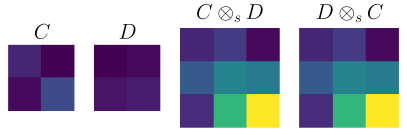

In [7]:
# Plot
matdict = {"$C$": C, "$D$": D, "$C \otimes_s D$": Ws.todense(), "$D \otimes_s C$": Vs.todense()}
vmin = np.min([np.min(mat) for mat in list(matdict.values())])
vmax = np.max([np.max(mat) for mat in list(matdict.values())])

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 3.5), gridspec_kw={'width_ratios': [2, 2, 3, 3]})
for i, (title, mat) in enumerate(matdict.items()): 
    axes[i].imshow(mat, vmin=vmin, vmax=vmax)
    axes[i].set_axis_off()
    axes[i].title.set_text(title)
fig.tight_layout()

Note, that the symmetric Kronecker product generally does **not** have a **symmetric** matrix representation. If its arguments are symmetric, then so is their product. We also observe another property of the symmetric Kronecker product, namely that $C \otimes_s D = D \otimes_s C$.

## Linear Operators as Random Variables

In [8]:
import scipy.sparse
from probnum.linalg.linear_operators import MatrixMult, Identity
from probnum.probability import RandomVariable, Normal

# Linear operators _as_ random variables
m = 30
n = 15
mat = scipy.sparse.rand(m=m, n=n, density=0.1, random_state=1).todense()

opmean = MatrixMult(A=mat)
opcov = Kronecker(A=0.1 * Identity(m), B=0.1 * Identity(n))

Y = RandomVariable(distribution=Normal(mean=opmean, cov=opcov))
print(Y)

# Draw samples
Ysamples = Y.sample(3)

<(30, 15) RandomVariable with dtype=<class 'float'>>


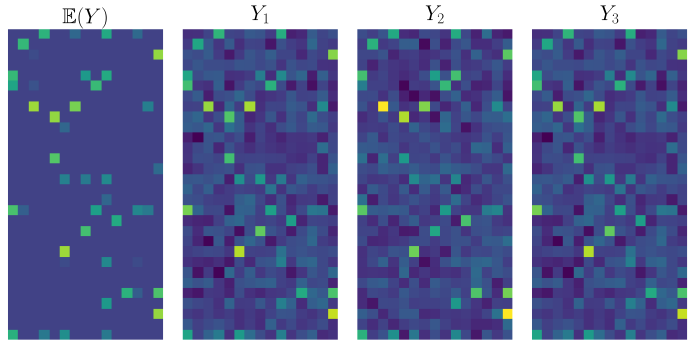

In [9]:
# Plot
rvdict = {"$\mathbb{E}(Y)$" : Y.mean().todense(), 
          "$Y_1$" : Ysamples[2], "$Y_2$" : Ysamples[1], "$Y_3$" : Ysamples[2]}
vmin = np.min([np.min(mat) for mat in list(rvdict.values())])
vmax = np.max([np.max(mat) for mat in list(rvdict.values())])

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5), sharey=True)
for i, (title, rv) in enumerate(rvdict.items()):
    axes[i].imshow(rv, vmin=vmin, vmax=vmax)
    axes[i].set_axis_off()
    axes[i].title.set_text(title)
plt.tight_layout()